In [1]:
import torch
import torch.nn as nn
import numpy as np

In [2]:
from nltk import FreqDist
from nltk.corpus import stopwords

In [3]:


text = """Man and women are the two genders. Strongest man will be awarded as the king and strongest women will be awarded
as the queen. King job is to protect from enemy and queen job is to take care of their people.Enemey used to attack king 
as he is the most strongest person and queen used to protect his king"""
sample_words = text.split()
sample_words = [word for word in sample_words if word not in stopwords.words('english')]
text = " ".join(sample_words)
text = text.replace(',','').replace('.','').lower().split()



In [4]:
text

['man',
 'women',
 'two',
 'genders',
 'strongest',
 'man',
 'awarded',
 'king',
 'strongest',
 'women',
 'awarded',
 'queen',
 'king',
 'job',
 'protect',
 'enemy',
 'queen',
 'job',
 'take',
 'care',
 'peopleenemey',
 'used',
 'attack',
 'king',
 'strongest',
 'person',
 'queen',
 'used',
 'protect',
 'king']

In [6]:
corpus = set(text)
corpus_length = len(corpus)

word_dict = {}
inverse_word_dict = {}

for i, word in enumerate(corpus):
    word_dict[word] = i
    inverse_word_dict[i] = word

data = []

for i in range(2, len(text) - 2):
    sentence = [text[i-2], text[i-1],
               text[i+1], text[i+2]]
    sentence = [ text[i-1],
               text[i+1]]
    target = text[i]
    data.append((sentence, target))
    
print(data[1])

(['two', 'strongest'], 'genders')


In [8]:
embedding_length = 20

class CBoW(torch.nn.Module):

    def __init__(self, corpus_length, embedding_dim):
        super(CBoW, self).__init__()
        
        self.embeddings = nn.Embedding(corpus_length, embedding_dim)

        self.linear1 = nn.Linear(embedding_dim, 64)
        self.linear2 = nn.Linear(64, corpus_length)
        
        self.activation_function1 = nn.ReLU()
        self.activation_function2 = nn.LogSoftmax(dim = -1)

    def forward(self, inputs):
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        out = self.activation_function2(out)
        return out

    def get_word_emdedding(self, word):
        word = torch.LongTensor([word_dict[word]])
        return self.embeddings(word).view(1,-1)


In [9]:
model = CBoW(corpus_length, embedding_length)

loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

def make_sentence_vector(sentence, word_dict):
    idxs = [word_dict[w] for w in sentence]
    return torch.tensor(idxs, dtype=torch.long)

print(make_sentence_vector(['women', 'genders'], word_dict))

tensor([16,  5])


In [10]:
# log_probs

NameError: name 'log_probs' is not defined

In [11]:
torch.tensor([word_dict[target]], dtype=torch.long)
#word_dict[target]

tensor([2])

In [21]:
for epoch in range(200):
    epoch_loss = 0
    for sentence, target in data:
        model.zero_grad()
        sentence_vector = make_sentence_vector(sentence, word_dict)  
        log_probs = model(sentence_vector)
        loss = loss_function(log_probs, torch.tensor([word_dict[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.data
    print('Epoch: '+str(epoch)+', Loss: ' + str(epoch_loss.item()))

Epoch: 0, Loss: 7.957911968231201
Epoch: 1, Loss: 7.952478408813477
Epoch: 2, Loss: 7.949704170227051
Epoch: 3, Loss: 7.936933994293213
Epoch: 4, Loss: 7.935382843017578
Epoch: 5, Loss: 7.927143573760986
Epoch: 6, Loss: 7.920593738555908
Epoch: 7, Loss: 7.912387371063232
Epoch: 8, Loss: 7.910103797912598
Epoch: 9, Loss: 7.898046016693115
Epoch: 10, Loss: 7.8972249031066895
Epoch: 11, Loss: 7.887750148773193
Epoch: 12, Loss: 7.878573894500732
Epoch: 13, Loss: 7.878543376922607
Epoch: 14, Loss: 7.866605281829834
Epoch: 15, Loss: 7.867684364318848
Epoch: 16, Loss: 7.853748321533203
Epoch: 17, Loss: 7.8539347648620605
Epoch: 18, Loss: 7.844695091247559
Epoch: 19, Loss: 7.836401462554932
Epoch: 20, Loss: 7.83474588394165
Epoch: 21, Loss: 7.827732563018799
Epoch: 22, Loss: 7.822360038757324
Epoch: 23, Loss: 7.813878059387207
Epoch: 24, Loss: 7.814540863037109
Epoch: 25, Loss: 7.801180362701416
Epoch: 26, Loss: 7.7993645668029785
Epoch: 27, Loss: 7.7974629402160645
Epoch: 28, Loss: 7.78660058

In [22]:
def get_predicted_result(input, inverse_word_dict):
    index = np.argmax(input)
    return inverse_word_dict[index]

def predict_sentence(sentence):
    sentence_split = sentence.replace('.','').lower().split()
    sentence_vector = make_sentence_vector(sentence_split, word_dict)
    prediction_array = model(sentence_vector).data.numpy()
    print('Preceding Words: {}\n'.format(sentence_split[:2]))
    print('Predicted Word: {}\n'.format(get_predicted_result(prediction_array[0], inverse_word_dict)))
    print('Following Words: {}\n'.format(sentence_split[2:]))

In [23]:
predict_sentence("Strongest man  king")

Preceding Words: ['strongest', 'man']

Predicted Word: awarded

Following Words: ['king']



In [30]:
print(model.get_word_emdedding('king'))

tensor([[ 0.1867,  0.8547, -1.5341, -1.8490, -1.2475,  0.8279, -0.1355, -0.0759,
          1.4680, -1.4173, -1.1656, -0.1468, -0.5002,  1.1620, -0.9542, -0.4903,
          0.9888,  0.7630,  0.6220, -1.1513]], grad_fn=<ViewBackward0>)


In [25]:
# Learned W
a,b,c,d,_ = model.parameters()
#print(W.detach())

In [26]:
a

Parameter containing:
tensor([[ 9.8391e-02, -5.4832e-01, -9.7706e-01, -1.0541e+00, -1.6154e+00,
         -2.2812e+00,  2.1466e+00,  1.6693e-01,  6.3106e-01, -9.9896e-01,
          1.2345e+00, -1.6487e-01, -8.0708e-01,  1.1229e+00,  2.7966e-01,
         -9.4042e-01,  5.7943e-01, -2.8031e-01,  1.2180e+00,  1.3818e-01],
        [-1.6186e+00,  1.5012e-01, -8.7005e-01, -2.5266e-01, -2.1852e+00,
          1.8073e+00, -1.7063e+00,  1.0911e+00, -9.2066e-01,  3.3691e-01,
         -5.4179e-01, -1.3784e+00,  7.4385e-01,  9.5640e-01,  6.7330e-01,
         -1.0277e+00,  6.8878e-01,  3.8293e-01, -9.4246e-01, -4.1882e-02],
        [-1.2067e+00,  7.7384e-01,  1.6715e+00,  1.3201e-01, -1.4999e+00,
         -5.6968e-01, -4.2839e-01,  6.9384e-01,  7.3682e-01, -5.3587e-01,
         -1.0432e+00,  7.4097e-01, -8.0302e-01,  1.3457e+00,  1.2629e+00,
         -8.6046e-01,  2.2710e+00, -1.4642e+00,  1.1300e+00,  1.3028e+00],
        [ 1.6420e-01, -4.8386e-02,  2.4222e-01, -3.5212e-01, -9.1151e-01,
          2.7

In [27]:
word_list = list(set(text))


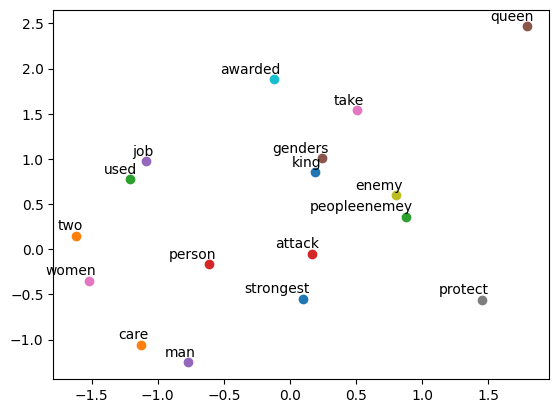

In [28]:
import matplotlib.pyplot as plt
for i, word in enumerate(word_list):
    
    W = a.detach()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()